<a href="https://colab.research.google.com/github/aflores/samples/blob/master/kata_add_cols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A pandas kata to create new columns for a dataframe

In [0]:
import pandas as pd
import numpy as np
import re 
from matplotlib import pyplot as plt

In [0]:
# create a data frame
df = pd.DataFrame({
    "name": ["aaa","abb","acc","bbb","bcc","baa","caa","cbb","ccc","aab","aac","bba","bbc","cca","ccb"], 
    "amount":[10,-11,12,-13,14,-15,16,-17,18,-19,20,-21,22,-23,24]
    })

In [0]:
df['cr'] = np.where(df['amount'] > 0, df['amount'],0)
df['dr'] = np.where(df['amount'] < 0, df['amount'],0)

In [0]:
def lookup_cat(name):
  if re.search(r"aa",name,re.I):
    return "aa"
  elif re.search(r"bb",name,re.I):
    return "bb"
  elif re.search(r"cc",name,re.I):
    return "cc"
  else:
    return "tbd"  

In [0]:
df['cat'] = df.apply(lambda r : lookup_cat(r['name']),axis=1)

In [163]:
df

,name,amount,cr,dr,cat
0,aaa,10,10,0,aa
1,abb,-11,0,-11,bb
2,acc,12,12,0,cc
3,bbb,-13,0,-13,bb
4,bcc,14,14,0,cc
5,baa,-15,0,-15,aa
6,caa,16,16,0,aa
7,cbb,-17,0,-17,bb
8,ccc,18,18,0,cc
9,aab,-19,0,-19,aa


In [0]:
cat_cr = df.groupby(by="cat").sum()["cr"]
cat_dr = (-1)*df.groupby(by="cat").sum()["dr"]

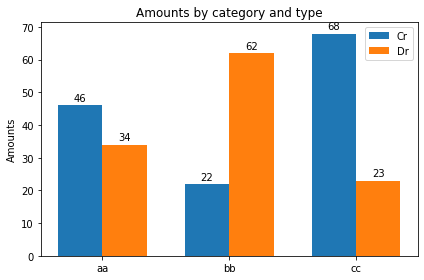

In [165]:
labels= df['cat'].unique()

x = np.arange(len(labels))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cat_cr, width, label='Cr')
rects2 = ax.bar(x + width/2, cat_dr, width, label='Dr')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amounts')
ax.set_title('Amounts by category and type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
              
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()